In [1]:
# Cell 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
from pathlib import Path

# Set plot style
plt.style.use('seaborn-v0_8')  # Fixed deprecated style
sns.set_palette('viridis')

# Download NLTK stopwords
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Cell 2: Set Up Project Paths
BASE_DIR = Path(r'C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price')
DATA_DIR = BASE_DIR / 'data'
ASSETS_DIR = BASE_DIR / 'assets' / 'task1'

# Create directories if they don't exist
for dir_path in [DATA_DIR, ASSETS_DIR]:
    dir_path.mkdir(parents=True, exist_ok=True)

# Verify directories
for dir_path, name in [(DATA_DIR, 'Data'), (ASSETS_DIR, 'Task 1 Assets')]:
    if not dir_path.exists():
        raise FileNotFoundError(f"{name} directory {dir_path} does not exist.")
    print(f"{name} directory: {dir_path}")

Data directory: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price\data
Task 1 Assets directory: C:\Users\yusuf\Desktop\10Academy\week_1\Predicting-Stock-Price\assets\task1


In [3]:
# Cell 3: Load Dataset
news_df = pd.read_csv(DATA_DIR / 'raw_analyst_ratings.csv')
print("Data loaded successfully!")
print(f"Shape: {news_df.shape}")
print("\nFirst 5 rows:")
display(news_df.head())

Data loaded successfully!
Shape: (1407328, 6)

First 5 rows:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
# Cell 4: Basic Info and Statistics
print("\nData info:")
display(news_df.info())

print("\nDescriptive statistics:")
display(news_df.describe(include='all'))


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


None


Descriptive statistics:


,Unnamed: 0,headline,url,publisher,date,stock
count,1.407328e+06,1407328,1407328,1407328,1407328,1407328
unique,NaN,845770,883429,1034,39957,6204
top,NaN,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,NaN,5449,1704,228373,1766,3333
mean,7.072454e+05,NaN,NaN,NaN,NaN,NaN
std,4.081009e+05,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,3.538128e+05,NaN,NaN,NaN,NaN,NaN
50%,7.072395e+05,NaN,NaN,NaN,NaN,NaN
75%,1.060710e+06,NaN,NaN,NaN,NaN,NaN



Headline length statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


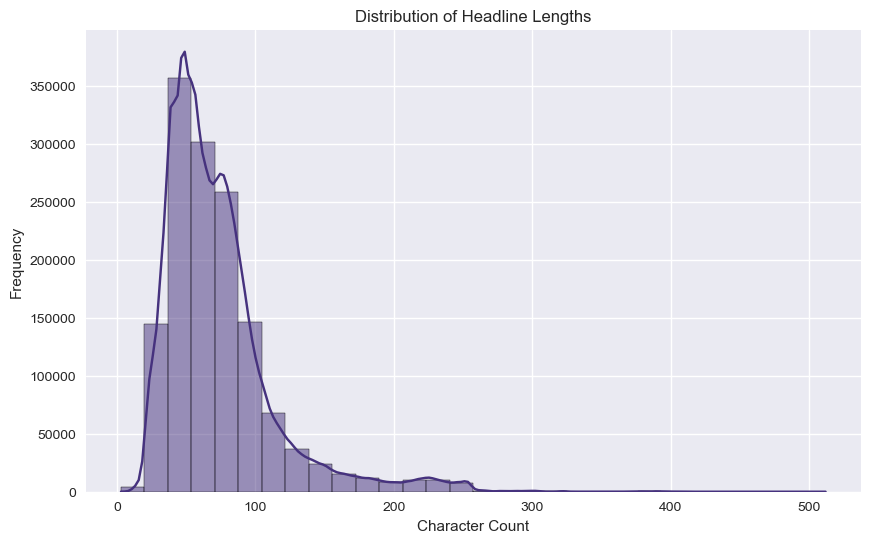

In [9]:
# Cell 5: Headline Length Analysis
news_df['headline_length'] = news_df['headline'].astype(str).apply(len)
print("\nHeadline length statistics:")
print(news_df['headline_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(news_df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.savefig(ASSETS_DIR / 'headline_length_dist.png')
plt.show()


Top 10 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


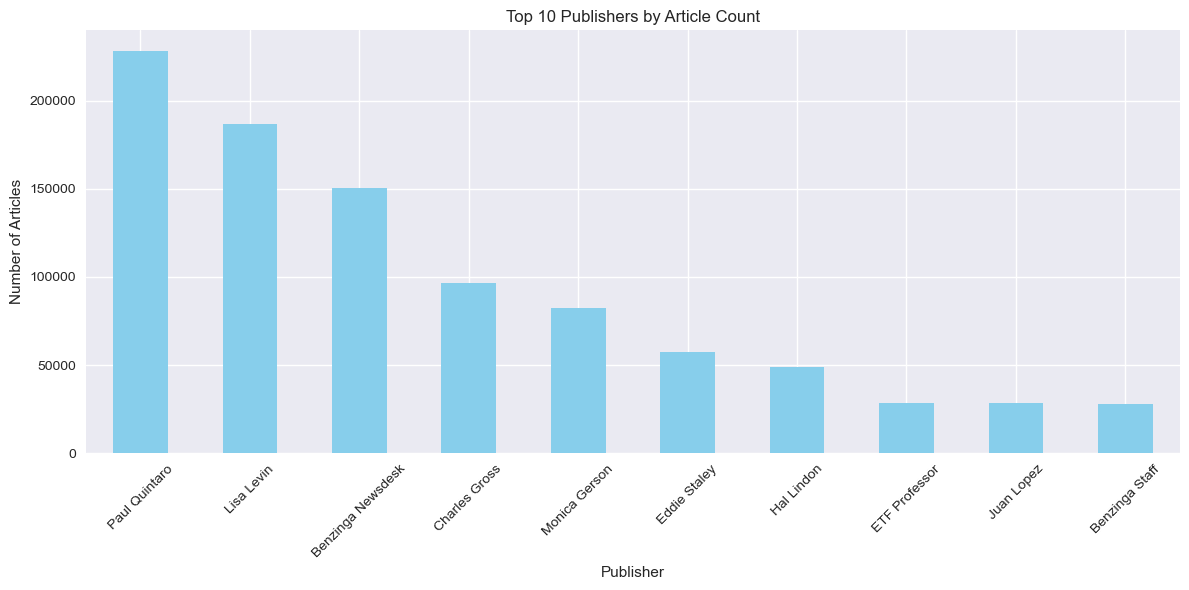

In [5]:
# Cell 6: Articles per Publisher
publisher_counts = news_df['publisher'].value_counts().head(10)
print("\nTop 10 Publishers:")
print(publisher_counts)

plt.figure(figsize=(12, 6))
publisher_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(ASSETS_DIR / 'top_publishers.png')
plt.show()

Invalid dates dropped: 1351341

Daily article counts:
date
2011-04-28 00:00:00+00:00    3
2011-04-29 00:00:00+00:00    2
2011-04-30 00:00:00+00:00    1
2011-05-01 00:00:00+00:00    1
2011-05-02 00:00:00+00:00    9
Freq: D, dtype: int64


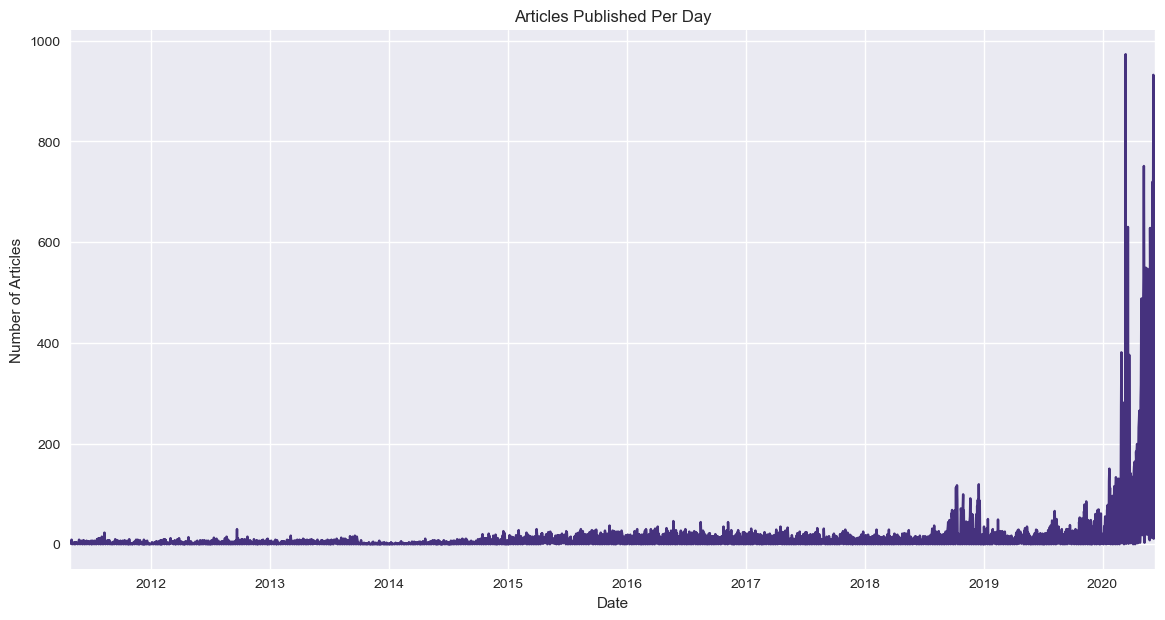

In [6]:
# Cell 7: Time Series Analysis (Articles per Day)

# Convert 'date' to datetime with UTC to avoid offset-aware/naive mismatch
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', utc=True)

# Drop rows with invalid dates
invalid_dates = news_df['date'].isna().sum()
print(f"Invalid dates dropped: {invalid_dates}")
news_df = news_df.dropna(subset=['date'])

# Resample by day
daily_counts = news_df.resample('D', on='date').size()
print("\nDaily article counts:")
print(daily_counts.head())

# Plot
plt.figure(figsize=(14, 7))
daily_counts.plot()
plt.title('Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.savefig(ASSETS_DIR / 'articles_per_day.png')
plt.show()


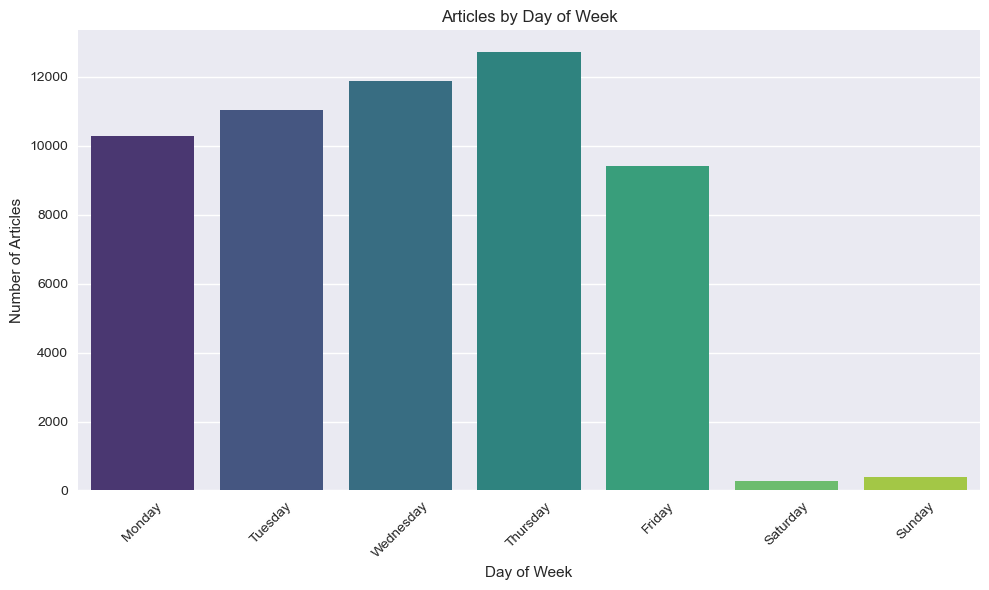

In [7]:
# Cell 8: Articles by Day of Week
news_df['day_of_week'] = news_df['date'].dt.day_name()
day_counts = news_df['day_of_week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, hue=day_counts.index, palette='viridis', legend=False)
plt.title('Articles by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(ASSETS_DIR / 'articles_by_weekday.png')
plt.show()



Top 20 Keywords:
stocks: 12747
shares: 8326
trading: 6547
hit: 5895
eps: 5503
price: 5015
target: 4650
several: 4650
companies: 4648
sales: 4381
market: 3971
higher: 3816
lows: 3703
maintains: 3266
new: 3099
session: 3053
reports: 3016
moving: 2867
amid: 2672
highs: 2601


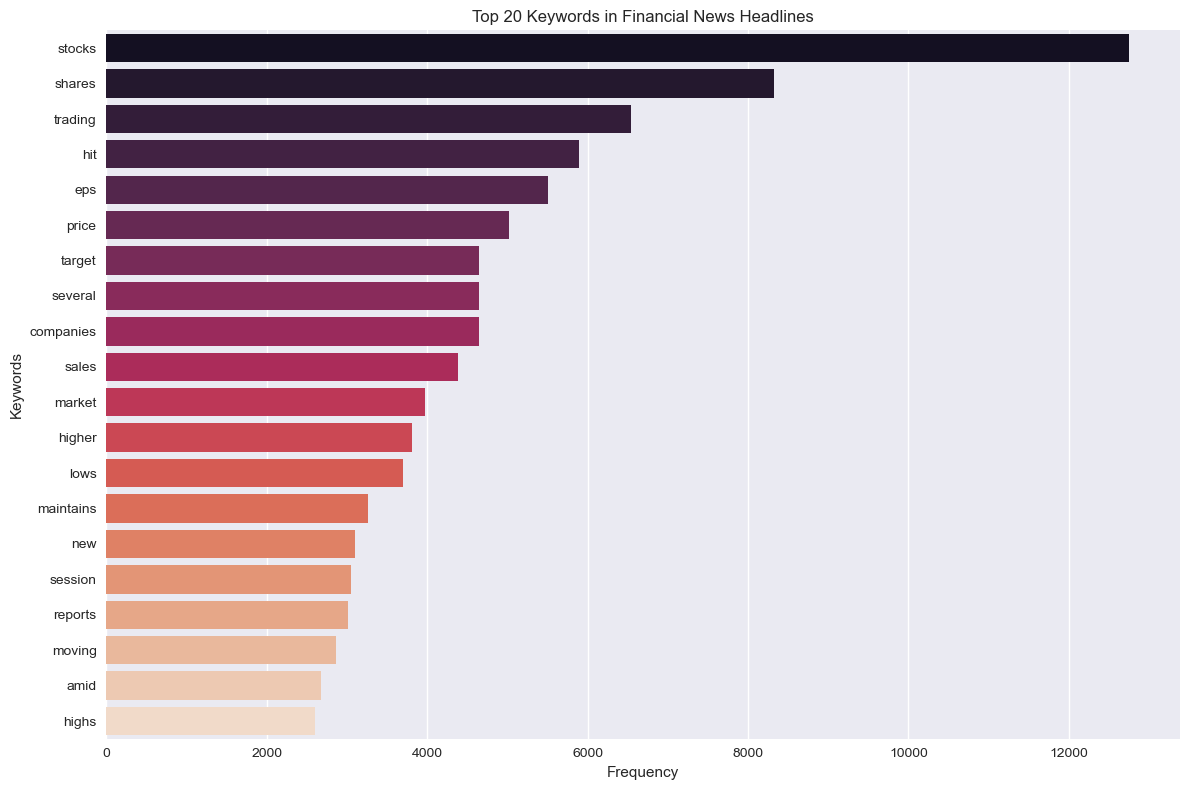

In [9]:
# Cell 9: Text Analysis – Top 20 Keywords in Headlines
all_headlines = ' '.join(news_df['headline'].astype(str)).lower()
words = all_headlines.split()
filtered_words = [word for word in words if word not in stop_words and len(word) > 2 and word.isalpha()]

# Count top words
word_counts = Counter(filtered_words)
top_keywords = word_counts.most_common(20)
print("\nTop 20 Keywords:")
for word, count in top_keywords:
    print(f"{word}: {count}")

# Plot
keywords, counts = zip(*top_keywords)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(keywords), hue=list(keywords), palette='rocket', legend=False)
plt.title('Top 20 Keywords in Financial News Headlines')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.tight_layout()
plt.savefig(ASSETS_DIR / 'top_keywords.png')
plt.show()



Publisher fields contain email addresses

Top 10 Publisher Domains:
domain
N/A             54788
benzinga.com     1196
gmail.com           3
Name: count, dtype: int64


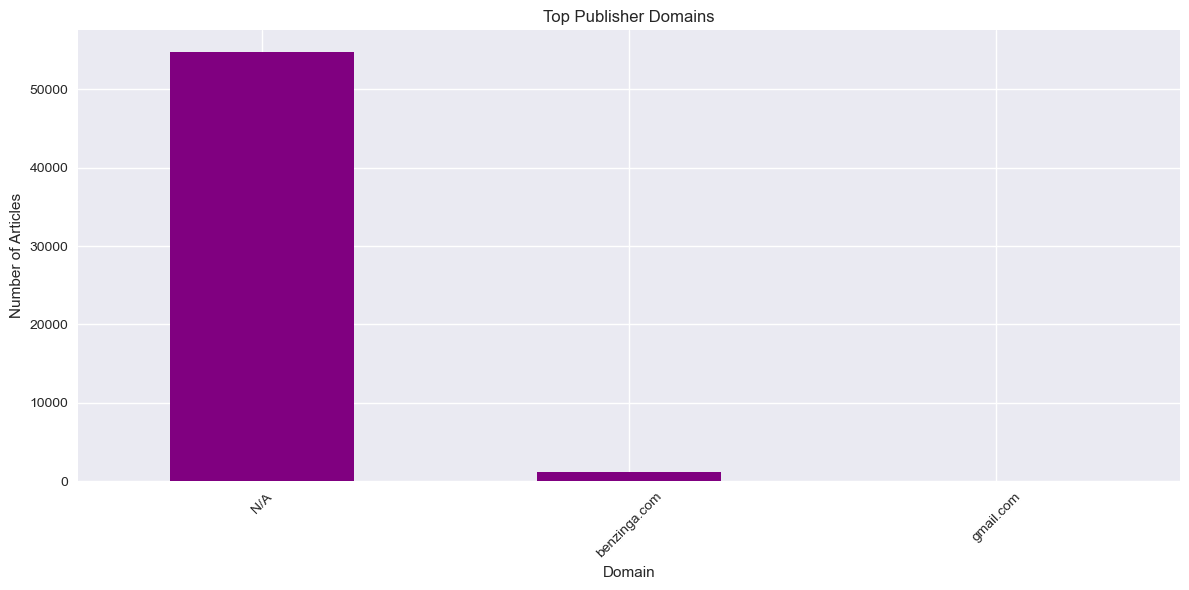

Rows dropped due to invalid dates: 0


In [10]:
# Cell 10: Publisher Email Domain Analysis
if any('@' in str(x) for x in news_df['publisher']):
    print("\nPublisher fields contain email addresses")

    # Extract domains
    news_df['domain'] = news_df['publisher'].apply(
        lambda x: x.split('@')[1] if '@' in str(x) else 'N/A'
    )

    # Top domains
    domain_counts = news_df['domain'].value_counts().head(10)
    print("\nTop 10 Publisher Domains:")
    print(domain_counts)

    plt.figure(figsize=(12, 6))
    domain_counts.plot(kind='bar', color='purple')
    plt.title('Top Publisher Domains')
    plt.xlabel('Domain')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(ASSETS_DIR / 'top_domains.png')
    plt.show()
else:
    print("\nPublisher fields do not contain email addresses")

# Verify rows dropped due to invalid dates
initial_len = len(news_df)
news_df = news_df.dropna(subset=['date'])
print(f"Rows dropped due to invalid dates: {initial_len - len(news_df)}")